In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_datareader import data as wb

C:\Users\smartestpersonalive\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [177]:
# companies I am looking for
tickers = ['BCE.TO','BPY-UN.TO','RY.TO','SU.TO', 'ENB.TO']
mystocks = pd.DataFrame()

# extract data from yahoo finance
for a in tickers:
    mystocks[a] = wb.DataReader(a, data_source = 'yahoo', start="2013-7-1")['Adj Close']
    


In [158]:
mystocks.head()

BCE.TO  BPY-UN.TO      RY.TO      SU.TO     ENB.TO
Date                                                             
2013-07-02  30.166681  15.553943  45.918701  24.953312  32.417030
2013-07-03  29.935219  15.289946  45.632320  24.921320  32.164230
2013-07-04  30.152655  15.575945  45.835796  24.873329  32.214794
2013-07-05  30.096535  15.766608  45.873474  24.897324  31.976429
2013-07-08  30.292931  15.627281  46.092037  25.273228  32.222012

In [21]:
# normalize the data 
normalized_data = mystocks / mystocks.iloc[0] * 100

# check for errors
print(normalized_data.head())
print(normalized_data.tail())

                BCE.TO   BPY-UN.TO       RY.TO       SU.TO      ENB.TO
Date                                                                  
2013-07-02  100.000000  100.000000  100.000000  100.000000  100.000000
2013-07-03   99.232721   98.302700   99.376331   99.871793   99.220163
2013-07-04   99.953503  100.141458   99.819453   99.679470   99.376142
2013-07-05   99.767470  101.367277   99.901506   99.775628   98.640834
2013-07-08  100.418506  100.471511  100.377485  101.282057   99.398406
                BCE.TO   BPY-UN.TO       RY.TO       SU.TO      ENB.TO
Date                                                                  
2020-06-08  195.279536  119.326655  209.217589  113.932773  139.803058
2020-06-09  193.482587  111.611576  206.103389  110.646638  136.533167
2020-06-10  193.907308  103.703604  203.054519  105.957881  132.954802
2020-06-11  189.006533   94.316923  195.759020   97.061261  127.834037
2020-06-12  189.911513   97.338666  198.938550   99.666132  129.962556


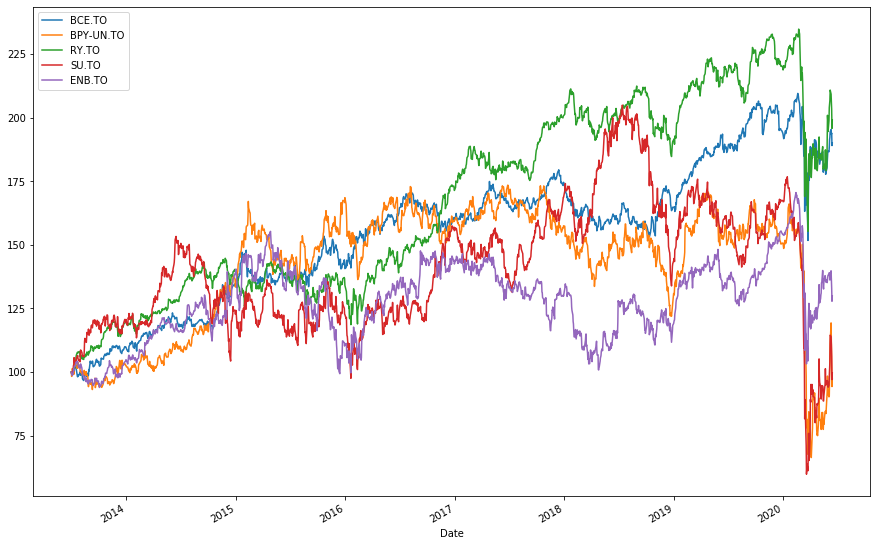

In [22]:
# plt.figure(figsize=(15,10))
# sns.lineplot(data=normalized_data)
ax = normalized_data.plot(figsize = (15,10))

plt.show()

In [24]:
# Calculate the return of the portfolio
# find the percentage change per day
returns = mystocks / mystocks.shift(1) - 1
returns.head()

BCE.TO  BPY-UN.TO     RY.TO     SU.TO    ENB.TO
Date                                                         
2013-07-02       NaN        NaN       NaN       NaN       NaN
2013-07-03 -0.007673  -0.016973 -0.006237 -0.001282 -0.007798
2013-07-04  0.007264   0.018705  0.004459 -0.001926  0.001572
2013-07-05 -0.001861   0.012241  0.000822  0.000965 -0.007399
2013-07-08  0.006526  -0.008837  0.004764  0.015098  0.007680

In [28]:
# weightings of each stock in the portfolio
# Assume 25% each first
weights = np.array([0.25,0.25,0.25,0.25,0.25])
weights

array([0.25, 0.25, 0.25, 0.25, 0.25])

In [29]:
np.dot(returns,weights)

array([        nan, -0.00999073,  0.0075185 , ..., -0.03800878,
       -0.06854898,  0.02413909])

In [30]:
# use approximately 250 trading days to account for off market days
annual_returns = returns.mean() * 250
annual_returns

BCE.TO       0.105560
BPY-UN.TO    0.036506
RY.TO        0.115095
SU.TO        0.051289
ENB.TO       0.073855
dtype: float64

In [33]:
# estimate dot product
np.dot(annual_returns, weights)
portfolio = round(np.dot(annual_returns,weights),4)
print(f"This portfolio has a annual return of {portfolio * 100}%")

This portfolio has a annual return of 9.56%


### Calculating risk of the securities


In [36]:
# list out all companies within the portfolio
tickers

['BCE.TO', 'BPY-UN.TO', 'RY.TO', 'SU.TO', 'ENB.TO']

### BCE.TO

In [40]:
# Annual rate of returns
returns[tickers].mean() * 250

BCE.TO       0.105560
BPY-UN.TO    0.036506
RY.TO        0.115095
SU.TO        0.051289
ENB.TO       0.073855
dtype: float64

In [45]:
# standard deviations
# annualized standard deviations
returns[tickers].std() * (250 ** 0.5)

BCE.TO       0.164390
BPY-UN.TO    0.281756
RY.TO        0.181927
SU.TO        0.320283
ENB.TO       0.269120
dtype: float64

BCE and RBC have higher rate of returns and lower volatility percentage

In [48]:
# Calculate the variance 
returns[tickers].var() * 250

BCE.TO       0.027024
BPY-UN.TO    0.079386
RY.TO        0.033098
SU.TO        0.102581
ENB.TO       0.072426
dtype: float64

In [52]:
# Calculate the covariance (annualized)
cov_matrix = returns.cov() * 250
cov_matrix

BCE.TO  BPY-UN.TO     RY.TO     SU.TO    ENB.TO
BCE.TO     0.027024   0.021729  0.018415  0.022564  0.022516
BPY-UN.TO  0.021729   0.079386  0.028128  0.037243  0.032458
RY.TO      0.018415   0.028128  0.033098  0.033573  0.028435
SU.TO      0.022564   0.037243  0.033573  0.102581  0.048950
ENB.TO     0.022516   0.032458  0.028435  0.048950  0.072426

In [54]:
# calculate the correlation betweeen stocks
corr_matrix = returns.corr()
corr_matrix

BCE.TO  BPY-UN.TO     RY.TO     SU.TO    ENB.TO
BCE.TO     1.000000   0.469126  0.615738  0.428556  0.508947
BPY-UN.TO  0.469126   1.000000  0.548749  0.412697  0.428058
RY.TO      0.615738   0.548749  1.000000  0.576175  0.580784
SU.TO      0.428556   0.412697  0.576175  1.000000  0.567902
ENB.TO     0.508947   0.428058  0.580784  0.567902  1.000000

### Calculate Portfolio Risk

Assuming the stocks within the portfolio all have equal weightings

In [55]:
weights = np.array([0.20,0.2,0.2,0.2,0.2])

In [58]:
# portfolio variance
# transpose the vector using .T (matrix multiplication)
portfolio_var = np.dot(weights.T, np.dot(cov_matrix, weights))
portfolio_var

0.03610148625072414

In [59]:
# portfolio volatility (standard deviation)
portfolio_vol = portfolio_var ** 0.5
portfolio_vol

0.19000391114586074

### Calculate Diversifiable and Non-diversifiable Risk of Portfolio
diversifiable risk = porfolio variance - weighted annual variances

In [64]:
# calculate annual variances for each stocks in the portfolio
stocks_var = returns[tickers].var()*250
tickers 

['BCE.TO', 'BPY-UN.TO', 'RY.TO', 'SU.TO', 'ENB.TO']

In [74]:
BCE_var = stocks_var[0]
BPY_var = stocks_var[1]
RY_var = stocks_var[2]
SU_var = stocks_var[3]
ENB_var = stocks_var[4]

In [77]:
# Diversifiable Risk:
diversifiable_risk = portfolio_var - (weights[0] ** 2 * BCE_var) - \
                                    (weights[1] ** 2 * BPY_var) - \
                                    (weights[2] ** 2 * RY_var) - \
                                    (weights[3] ** 2 * SU_var) - \
                                    (weights[4] ** 2 * ENB_var)
                
diversifiable_risk

0.023520884966147015

Through the formula we can see that the more companies you have within your portfoio the lower the diversifiable risk

In [81]:
# non-diversifiable risk
nondiversifiable_risk = portfolio_var - diversifiable_risk
nondiversifiable_risk

0.012580601284577123

In [82]:
print(f"The Diversifiable risk is {round(diversifiable_risk,4)*100}%")
print(f"The non-diversifiable risk is {round(nondiversifiable_risk,4)*100}%")

The Diversifiable risk is 2.35%
The non-diversifiable risk is 1.26%


### Obtaining the efficient frontier

In [159]:
mystocks


BCE.TO  BPY-UN.TO       RY.TO      SU.TO     ENB.TO
Date                                                              
2013-07-02  30.166681  15.553943   45.918701  24.953312  32.417030
2013-07-03  29.935219  15.289946   45.632320  24.921320  32.164230
2013-07-04  30.152655  15.575945   45.835796  24.873329  32.214794
2013-07-05  30.096535  15.766608   45.873474  24.897324  31.976429
2013-07-08  30.292931  15.627281   46.092037  25.273228  32.222012
...               ...        ...         ...        ...        ...
2019-12-23  58.999489  23.464397  101.184883  41.822014  50.368271
2019-12-24  58.844383  23.375666  101.096909  41.714325  50.397308
2019-12-27  58.757133  23.415104  101.136009  41.792645  50.126350
2019-12-30  58.485691  23.444681  100.852554  41.763275  49.932812
2019-12-31  58.320889  23.395386  100.432251  41.665375  49.961842

[1631 rows x 5 columns]

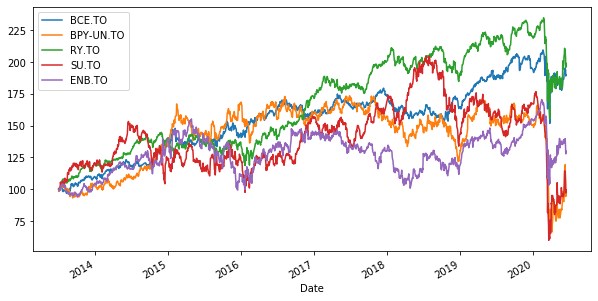

In [160]:
normalized_data.plot(figsize = (10,5))

In [178]:
# log returns
log_returns = np.log(mystocks / mystocks.shift(1))
log_returns.head()

BCE.TO  BPY-UN.TO     RY.TO     SU.TO    ENB.TO
Date                                                         
2013-07-02       NaN        NaN       NaN       NaN       NaN
2013-07-03 -0.007702  -0.017119 -0.006256 -0.001283 -0.007829
2013-07-04  0.007237   0.018532  0.004449 -0.001928  0.001571
2013-07-05 -0.001863   0.012167  0.000822  0.000964 -0.007427
2013-07-08  0.006504  -0.008876  0.004753  0.014985  0.007651

In [230]:
log_returns.sum()

BCE.TO       0.629624
BPY-UN.TO   -0.028957
RY.TO        0.688045
SU.TO       -0.011013
ENB.TO       0.264920
dtype: float64

In [179]:
# get the annual returns
print(log_returns.mean() * 250)

# get the covariance
print(log_returns.cov() * 250)

# get the correlation matrices
log_returns.corr()

BCE.TO       0.090204
BPY-UN.TO   -0.004149
RY.TO        0.098574
SU.TO       -0.001578
ENB.TO       0.037954
dtype: float64
             BCE.TO  BPY-UN.TO     RY.TO     SU.TO    ENB.TO
BCE.TO     0.027337   0.022662  0.018485  0.023469  0.022867
BPY-UN.TO  0.022662   0.081595  0.029027  0.039820  0.033846
RY.TO      0.018485   0.029027  0.032912  0.034409  0.028509
SU.TO      0.023469   0.039820  0.034409  0.104243  0.050875
ENB.TO     0.022867   0.033846  0.028509  0.050875  0.072760


BCE.TO  BPY-UN.TO     RY.TO     SU.TO    ENB.TO
BCE.TO     1.000000   0.479835  0.616275  0.439639  0.512732
BPY-UN.TO  0.479835   1.000000  0.560125  0.431764  0.439272
RY.TO      0.616275   0.560125  1.000000  0.587456  0.582574
SU.TO      0.439639   0.431764  0.587456  1.000000  0.584167
ENB.TO     0.512732   0.439272  0.582574  0.584167  1.000000

In [180]:
num_companies = len(tickers)
num_companies

5

In [181]:
weights

array([0.27844367, 0.03279616, 0.26495727, 0.29924855, 0.12455435])

In [182]:
# make weights equal to one:
weights = np.random.random(num_companies)
# divide by the sum to make weights sum to 1
weights /= np.sum(weights)
weights

array([0.15484491, 0.24095397, 0.29495831, 0.2977322 , 0.0115106 ])

In [183]:
# check if the sum of weight equates to 1
sum(weights)

0.9999999999999998

In [249]:
# Expected Portfolio Return
np.sum(weights * log_returns.mean() * 250)

0.040761651933127585

In [250]:
weights*log_returns.mean() * 250

BCE.TO       0.027546
BPY-UN.TO   -0.001348
RY.TO        0.009891
SU.TO       -0.000222
ENB.TO       0.004894
dtype: float64

In [185]:
# expected portfolio variance
np.dot(weights.T,np.dot(log_returns.cov()*250,weights))

0.039744275246569365

In [186]:
# Expected portfolio volatility (standard deviation)
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250,weights)))

0.1993596630378607

In [187]:
test = np.random.random(num_companies)
sum(test / np.sum(test))

1.0

In [257]:
portfolio_returns = []
portfolio_volatilities = []
portfolio_weights = []

for x in range (1000):
    weights = np.random.random(num_companies)
    weights /= np.sum(weights)
    portfolio_weights.append(weights)
    portfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))


    
# change portfolio_returns and volatilities into numpy arrays
portfolio_returns,portfolio_volatilities

([0.057197235859076774,
  0.041315955421593206,
  0.03805911205072467,
  0.048513865506991306,
  0.05673564209327431,
  0.045158035890762414,
  0.05396166854174856,
  0.052436666298928535,
  0.05319680460082797,
  0.0449370351697317,
  0.05371761815105753,
  0.0508531005351364,
  0.0375266724701012,
  0.03527320483345587,
  0.05119075578147385,
  0.03692426786275321,
  0.05061671481371048,
  0.06427606258895657,
  0.03505180917091348,
  0.06475254679226615,
  0.032388897737854284,
  0.049500630821463096,
  0.06768563770146901,
  0.02345530744738528,
  0.044918743387134384,
  0.032114912615855924,
  0.06606794848825538,
  0.03621286106763725,
  0.04298300145512257,
  0.06870601466777028,
  0.0454078607795739,
  0.05023476344443297,
  0.0540496280312451,
  0.06907019937871271,
  0.05209760440020979,
  0.048318065995902396,
  0.0476354127904157,
  0.05060195997773779,
  0.07446685031368959,
  0.037003006838383805,
  0.04213029961376669,
  0.06845460873098294,
  0.05028531254573607,
  0.04

In [252]:
len(portfolio_returns)

1000

In [253]:
portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)

In [240]:
weights

array([0.30537157, 0.32483142, 0.10033865, 0.14050197, 0.12895639])

In [254]:
# create a dataframe to store the values
portfolio = pd.DataFrame({"Return":portfolio_returns,
                         "Volatility": portfolio_volatilities})
portfolio

Return  Volatility
0    0.032895    0.201334
1    0.046744    0.191555
2    0.041353    0.215161
3    0.025056    0.217171
4    0.027357    0.223748
..        ...         ...
995  0.057840    0.182355
996  0.035620    0.207001
997  0.052960    0.192384
998  0.031781    0.210613
999  0.040724    0.191869

[1000 rows x 2 columns]

In [263]:
# include the weightings of the stocks 
for counter, symbol in enumerate(mystocks.columns.tolist()):
    print(counter,symbol)
    portfolio[f"{symbol} weight"] = [w[counter] for w in portfolio_weights]

0 BCE.TO
1 BPY-UN.TO
2 RY.TO
3 SU.TO
4 ENB.TO


In [267]:
portfolio.tail()

Return  Volatility  BCE.TO weight  BPY-UN.TO weight  RY.TO weight  \
995  0.057840    0.182355       0.130121          0.266453      0.082060   
996  0.035620    0.207001       0.065080          0.448867      0.158933   
997  0.052960    0.192384       0.435130          0.401569      0.130913   
998  0.031781    0.210613       0.211822          0.240955      0.213016   
999  0.040724    0.191869       0.212610          0.161826      0.134723   

     SU.TO weight  ENB.TO weight  
995      0.435729       0.085638  
996      0.291427       0.035692  
997      0.021854       0.010534  
998      0.116976       0.217231  
999      0.344375       0.146466

In [265]:
portfolio.corr()

Return  Volatility  BCE.TO weight  BPY-UN.TO weight  \
Return            1.000000   -0.882102       0.132900         -0.062262   
Volatility       -0.882102    1.000000      -0.096438          0.050508   
BCE.TO weight     0.132900   -0.096438       1.000000         -0.190774   
BPY-UN.TO weight -0.062262    0.050508      -0.190774          1.000000   
RY.TO weight     -0.014785    0.026802      -0.229439         -0.254674   
SU.TO weight     -0.066001    0.063441      -0.310171         -0.239818   
ENB.TO weight     0.009043   -0.043184      -0.270935         -0.285279   

                  RY.TO weight  SU.TO weight  ENB.TO weight  
Return               -0.014785     -0.066001       0.009043  
Volatility            0.026802      0.063441      -0.043184  
BCE.TO weight        -0.229439     -0.310171      -0.270935  
BPY-UN.TO weight     -0.254674     -0.239818      -0.285279  
RY.TO weight          1.000000     -0.260803      -0.251241  
SU.TO weight         -0.260803      1.000000      -0.206326  
ENB.TO weight        -0.251241     -0.206326       1.000000

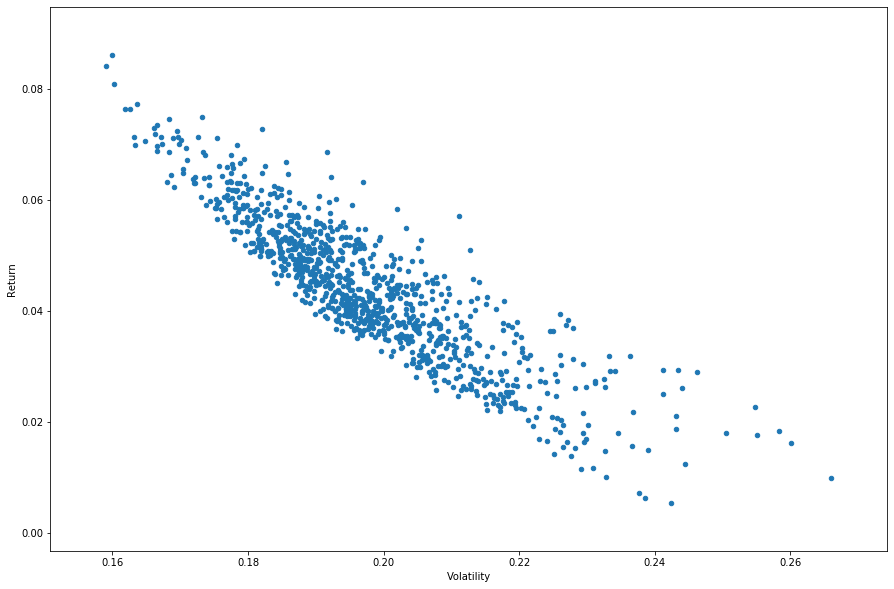

In [266]:
portfolio.plot(x='Volatility', y='Return', kind = "scatter", figsize=(15,10))

### Calculating the Beta of a stock


In [268]:
tickers

['BCE.TO', 'BPY-UN.TO', 'RY.TO', 'SU.TO', 'ENB.TO']

In [269]:
data = pd.DataFrame()
for a in tickers:
    data[a] = wb.DataReader(a, data_source='yahoo',start="2015-1-1",end='2020-1-1')['Adj Close']

In [ ]:
returns